In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Perceptron

# AND

In [28]:
#Geração dos Dados
N = 1000
x0 = np.ones(N,)
x1 = np.random.randint(0,2,N)
x2 = np.random.randint(0,2,N)

#Dados com ruído
x1n = x1 + 0.1*np.random.randn(N,)
x2n = x2 + 0.1*np.random.randn(N,)

xn = np.c_[x0, x1n, x2n]
y_and = x1 & x2
y_or = x1 | x2

dataset_and = np.c_[xn, y_and]
dataset_or = np.c_[xn, y_or]

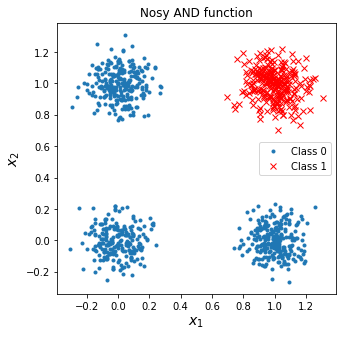

In [29]:
idx0 = np.argwhere(y_and == 0)
idx1 = np.argwhere(y_and == 1)

fig = plt.figure(figsize=(5,5))
plt.plot(x1n[idx0], x2n[idx0], '.', label='Class 0')
plt.plot(x1n[idx1], x2n[idx1], 'rx', label='Class 1')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.title('Nosy AND function')
plt.legend()
plt.show()

In [30]:
# Make a prediction with weights
def predict(row, weights):
    activation = weights[0]
    
    for i in range(len(row)-1):
        activation += weights[i + 1] * row[i]
        
    return 1.0 if activation >= 0.0 else 0.0

In [31]:
def train_weights(train, l_rate, n_epoch):
    weights = [0.0 for i in range(len(train[0]))]
    
    for epoch in range(n_epoch):
        sum_error = 0.0    
        
        for row in train:
            prediction = predict(row, weights)
            error = row[-1] - prediction
            sum_error += error**2
            
            weights[0] = weights[0] + l_rate * error
            
            for i in range(len(row)-1):
                weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
                
        print('epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
    
    return weights

In [32]:
l_rate = 0.001
n_epoch = 10

weights = train_weights(dataset_and, l_rate, n_epoch)

print('Weights:', weights)

epoch=0, lrate=0.001, error=29.000
epoch=1, lrate=0.001, error=0.000
epoch=2, lrate=0.001, error=0.000
epoch=3, lrate=0.001, error=0.000
epoch=4, lrate=0.001, error=0.000
epoch=5, lrate=0.001, error=0.000
epoch=6, lrate=0.001, error=0.000
epoch=7, lrate=0.001, error=0.000
epoch=8, lrate=0.001, error=0.000
epoch=9, lrate=0.001, error=0.000
Weights: [-0.003, -0.003, 0.0034599716853703803, 0.004464594257339514]


In [33]:
mse=0
ep=0

for row in dataset_and:
    prediction = predict(row, weights)
    mse = mse + ((1/N)*((prediction - row[-1])**2))
    ep = ep+1
    
    print("Expected=%d, Predicted=%d, MSE=%d" % (row[-1], prediction, mse))
    

Expected=0, Predicted=0, MSE=0
Expected=0, Predicted=0, MSE=0
Expected=1, Predicted=1, MSE=0
Expected=1, Predicted=1, MSE=0
Expected=1, Predicted=1, MSE=0
Expected=0, Predicted=0, MSE=0
Expected=0, Predicted=0, MSE=0
Expected=0, Predicted=0, MSE=0
Expected=1, Predicted=1, MSE=0
Expected=1, Predicted=1, MSE=0
Expected=1, Predicted=1, MSE=0
Expected=0, Predicted=0, MSE=0
Expected=1, Predicted=1, MSE=0
Expected=0, Predicted=0, MSE=0
Expected=1, Predicted=1, MSE=0
Expected=1, Predicted=1, MSE=0
Expected=0, Predicted=0, MSE=0
Expected=0, Predicted=0, MSE=0
Expected=1, Predicted=1, MSE=0
Expected=0, Predicted=0, MSE=0
Expected=1, Predicted=1, MSE=0
Expected=1, Predicted=1, MSE=0
Expected=0, Predicted=0, MSE=0
Expected=0, Predicted=0, MSE=0
Expected=1, Predicted=1, MSE=0
Expected=1, Predicted=1, MSE=0
Expected=0, Predicted=0, MSE=0
Expected=0, Predicted=0, MSE=0
Expected=1, Predicted=1, MSE=0
Expected=0, Predicted=0, MSE=0
Expected=0, Predicted=0, MSE=0
Expected=0, Predicted=0, MSE=0
Expected

In [34]:

per = Perceptron(alpha=0.001, max_iter=1000, shuffle=True, random_state=42)
per.fit(xn, y_and)

y_pe = per.predict(xn)

error = mean_squared_error(y_pe, y_and)

print('MSE: ', error)

print('Número de iterações necessárias para convergir: ', per.n_iter_)


MSE:  0.0
Número de iterações necessárias para convergir:  7


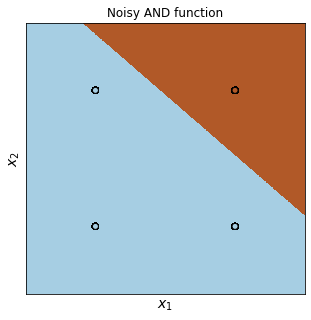

In [35]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x1.min() - .5, x1.max() + .5
y_min, y_max = x2.min() - .5, x2.max() + .5
h = .002  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = per.predict(np.c_[np.ones((len(xx.ravel()), 1)), xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(5, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(x1, x2, c=y_and, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.title('Noisy AND function')
plt.show()

# Or

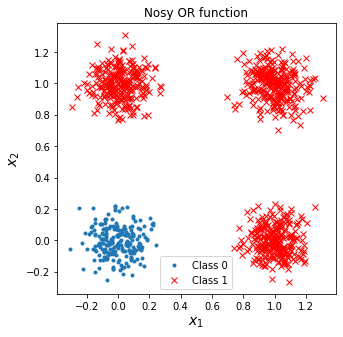

In [36]:
idx0 = np.argwhere(y_or == 0)
idx1 = np.argwhere(y_or == 1)

fig = plt.figure(figsize=(5,5))
plt.plot(x1n[idx0], x2n[idx0], '.', label='Class 0')
plt.plot(x1n[idx1], x2n[idx1], 'rx', label='Class 1')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.title('Nosy OR function')
plt.legend()
plt.show()

In [37]:
l_rate = 0.001
n_epoch = 10

weights = train_weights(dataset_or, l_rate, n_epoch)

print('Weights:', weights)

epoch=0, lrate=0.001, error=17.000
epoch=1, lrate=0.001, error=0.000
epoch=2, lrate=0.001, error=0.000
epoch=3, lrate=0.001, error=0.000
epoch=4, lrate=0.001, error=0.000
epoch=5, lrate=0.001, error=0.000
epoch=6, lrate=0.001, error=0.000
epoch=7, lrate=0.001, error=0.000
epoch=8, lrate=0.001, error=0.000
epoch=9, lrate=0.001, error=0.000
Weights: [-0.001, -0.001, 0.0031317036721445995, 0.004275174203039034]


In [38]:
mse_or=0
ep_or=0

for row in dataset_or:
    prediction_or = predict(row, weights)
    mse_or = mse_or + ((1/N)*((prediction_or - row[-1])**2))
    ep_or = ep_or + 1
    
    print("Expected=%d, Predicted=%d, MSE=%d" % (row[-1], prediction_or, mse_or))
    

Expected=1, Predicted=1, MSE=0
Expected=1, Predicted=1, MSE=0
Expected=1, Predicted=1, MSE=0
Expected=1, Predicted=1, MSE=0
Expected=1, Predicted=1, MSE=0
Expected=1, Predicted=1, MSE=0
Expected=1, Predicted=1, MSE=0
Expected=1, Predicted=1, MSE=0
Expected=1, Predicted=1, MSE=0
Expected=1, Predicted=1, MSE=0
Expected=1, Predicted=1, MSE=0
Expected=1, Predicted=1, MSE=0
Expected=1, Predicted=1, MSE=0
Expected=0, Predicted=0, MSE=0
Expected=1, Predicted=1, MSE=0
Expected=1, Predicted=1, MSE=0
Expected=1, Predicted=1, MSE=0
Expected=1, Predicted=1, MSE=0
Expected=1, Predicted=1, MSE=0
Expected=0, Predicted=0, MSE=0
Expected=1, Predicted=1, MSE=0
Expected=1, Predicted=1, MSE=0
Expected=1, Predicted=1, MSE=0
Expected=1, Predicted=1, MSE=0
Expected=1, Predicted=1, MSE=0
Expected=1, Predicted=1, MSE=0
Expected=1, Predicted=1, MSE=0
Expected=1, Predicted=1, MSE=0
Expected=1, Predicted=1, MSE=0
Expected=1, Predicted=1, MSE=0
Expected=1, Predicted=1, MSE=0
Expected=1, Predicted=1, MSE=0
Expected

In [40]:
per_or = Perceptron(alpha=0.001, max_iter=1000, shuffle=True, random_state=42)
per_or.fit(xn, y_or)

y_pe_or = per_or.predict(xn)

error_or = mean_squared_error(y_pe_or, y_or)

print('MSE: ', error_or)

print('Número de iterações necessárias para convergir: ', per_or.n_iter_)


MSE:  0.0
Número de iterações necessárias para convergir:  7


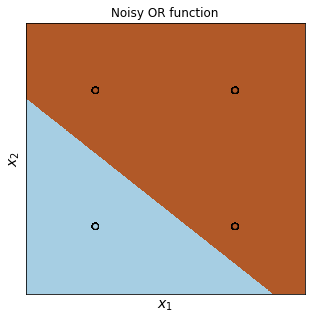

In [42]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x1.min() - .5, x1.max() + .5
y_min, y_max = x2.min() - .5, x2.max() + .5
h = .002  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = per_or.predict(np.c_[np.ones((len(xx.ravel()), 1)), xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(5, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(x1, x2, c=y_or, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.title('Noisy OR function')
plt.show()